In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from pandas import DataFrame

In [18]:
df=pd.read_csv('/content/saibaba.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [19]:
df.shape

(215, 15)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [22]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [23]:
df.describe(include='O')

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
count,215,215,215,215,215,215,215,215
unique,2,2,2,3,3,2,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,139,116,131,113,145,141,120,148


In [24]:
df.nunique()

sl_no             215
gender              2
ssc_p             103
ssc_b               2
hsc_p              97
hsc_b               2
hsc_s               3
degree_p           89
degree_t            3
workex              2
etest_p           100
specialisation      2
mba_p             205
status              2
salary             45
dtype: int64

In [25]:
df.isnull().any()

sl_no             False
gender            False
ssc_p             False
ssc_b             False
hsc_p             False
hsc_b             False
hsc_s             False
degree_p          False
degree_t          False
workex            False
etest_p           False
specialisation    False
mba_p             False
status            False
salary             True
dtype: bool

In [26]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [27]:
del df['salary']

In [28]:
del df['sl_no']

In [29]:
del df['ssc_b']

In [30]:
del df['hsc_b']

In [31]:
del df['hsc_s']

In [32]:
del df['degree_t']

In [33]:
del df['workex']

In [34]:
del df['specialisation']

In [35]:
df

,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,status
0,M,67.00,91.00,58.00,55.0,58.80,Placed
1,M,79.33,78.33,77.48,86.5,66.28,Placed
2,M,65.00,68.00,64.00,75.0,57.80,Placed
3,M,56.00,52.00,52.00,66.0,59.43,Not Placed
4,M,85.80,73.60,73.30,96.8,55.50,Placed
...,...,...,...,...,...,...,...
210,M,80.60,82.00,77.60,91.0,74.49,Placed
211,M,58.00,60.00,72.00,74.0,53.62,Placed
212,M,67.00,67.00,73.00,59.0,69.72,Placed
213,F,74.00,66.00,58.00,70.0,60.23,Placed


In [36]:
df.isnull().any()

gender      False
ssc_p       False
hsc_p       False
degree_p    False
etest_p     False
mba_p       False
status      False
dtype: bool

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    215 non-null    object 
 1   ssc_p     215 non-null    float64
 2   hsc_p     215 non-null    float64
 3   degree_p  215 non-null    float64
 4   etest_p   215 non-null    float64
 5   mba_p     215 non-null    float64
 6   status    215 non-null    object 
dtypes: float64(5), object(2)
memory usage: 11.9+ KB


In [38]:
df['gender'].value_counts()

M    139
F     76
Name: gender, dtype: int64

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
le=LabelEncoder

In [41]:
df['gender']=df['gender'].replace({'M':1,'F':0})

In [42]:
df['status']=df['status'].replace({'Placed':1,'Not Placed':0})

In [43]:
df

,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,status
0,1,67.00,91.00,58.00,55.0,58.80,1
1,1,79.33,78.33,77.48,86.5,66.28,1
2,1,65.00,68.00,64.00,75.0,57.80,1
3,1,56.00,52.00,52.00,66.0,59.43,0
4,1,85.80,73.60,73.30,96.8,55.50,1
...,...,...,...,...,...,...,...
210,1,80.60,82.00,77.60,91.0,74.49,1
211,1,58.00,60.00,72.00,74.0,53.62,1
212,1,67.00,67.00,73.00,59.0,69.72,1
213,0,74.00,66.00,58.00,70.0,60.23,1


In [44]:
def pf(feature):
  sns.boxplot(feature)

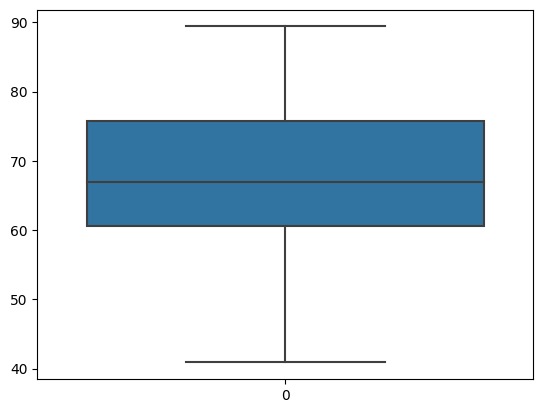

In [45]:
pf(df['ssc_p'])


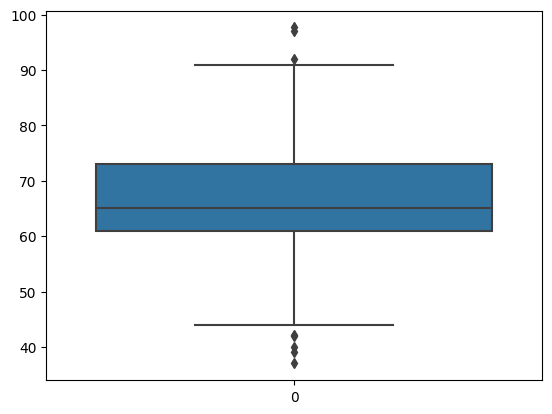

In [46]:
pf(df['hsc_p'])

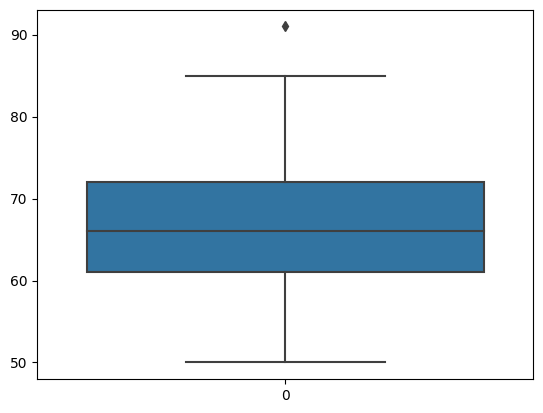

In [47]:
pf(df['degree_p'])

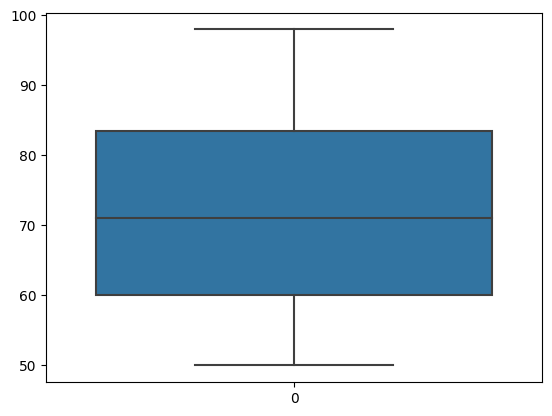

In [48]:
pf(df['etest_p'])

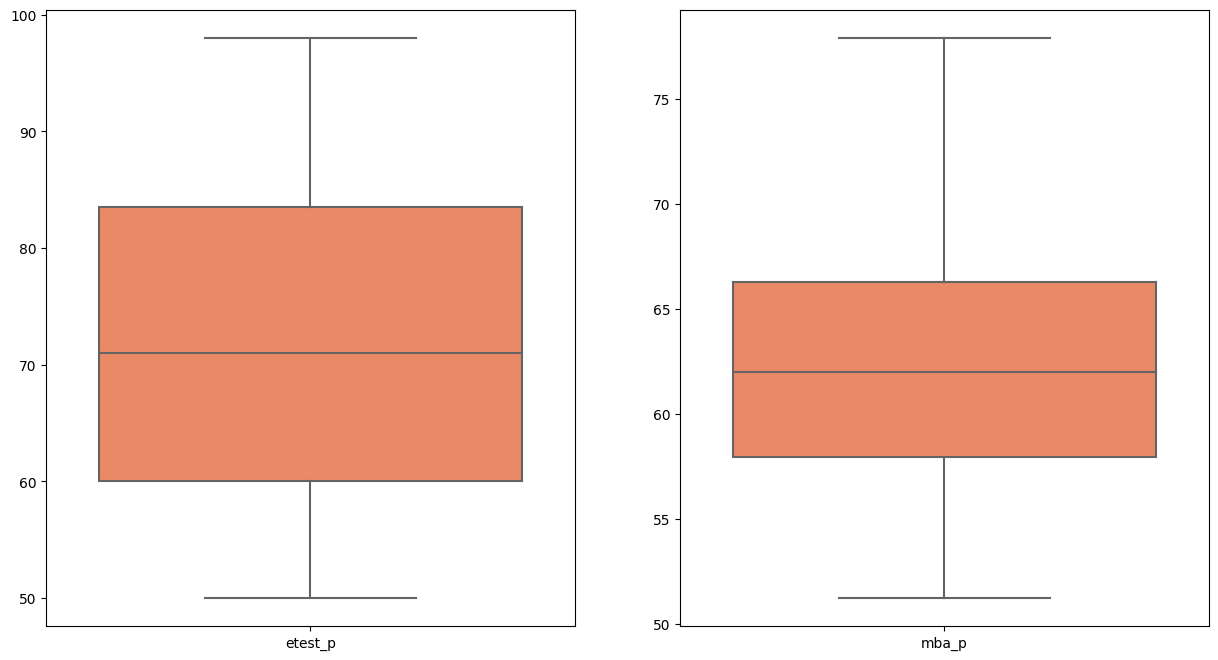

In [49]:
plt.subplots(1,2,figsize=(15,8))

plt.subplot(121)
sns.boxplot(data=df[['etest_p']],color='coral')


plt.subplot(122)
# plt.title("mba_p")
sns.boxplot(data=df[['mba_p']],color='coral')

plt.show()

<ipython-input-50-bf8d06852da1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['etest_p'],bins=12)


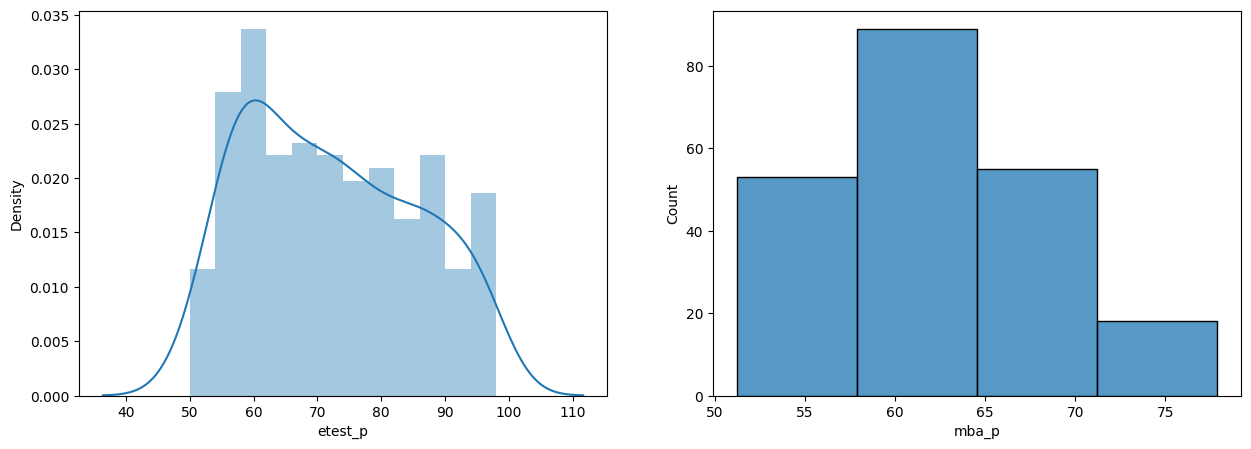

In [50]:
plt.subplots(1,2,figsize=(15,5))

plt.subplot(121)
sns.distplot(df['etest_p'],bins=12)

plt.subplot(122)
sns.histplot(df['mba_p'],bins=4)

plt.show()


<Axes: xlabel='degree_p', ylabel='count'>

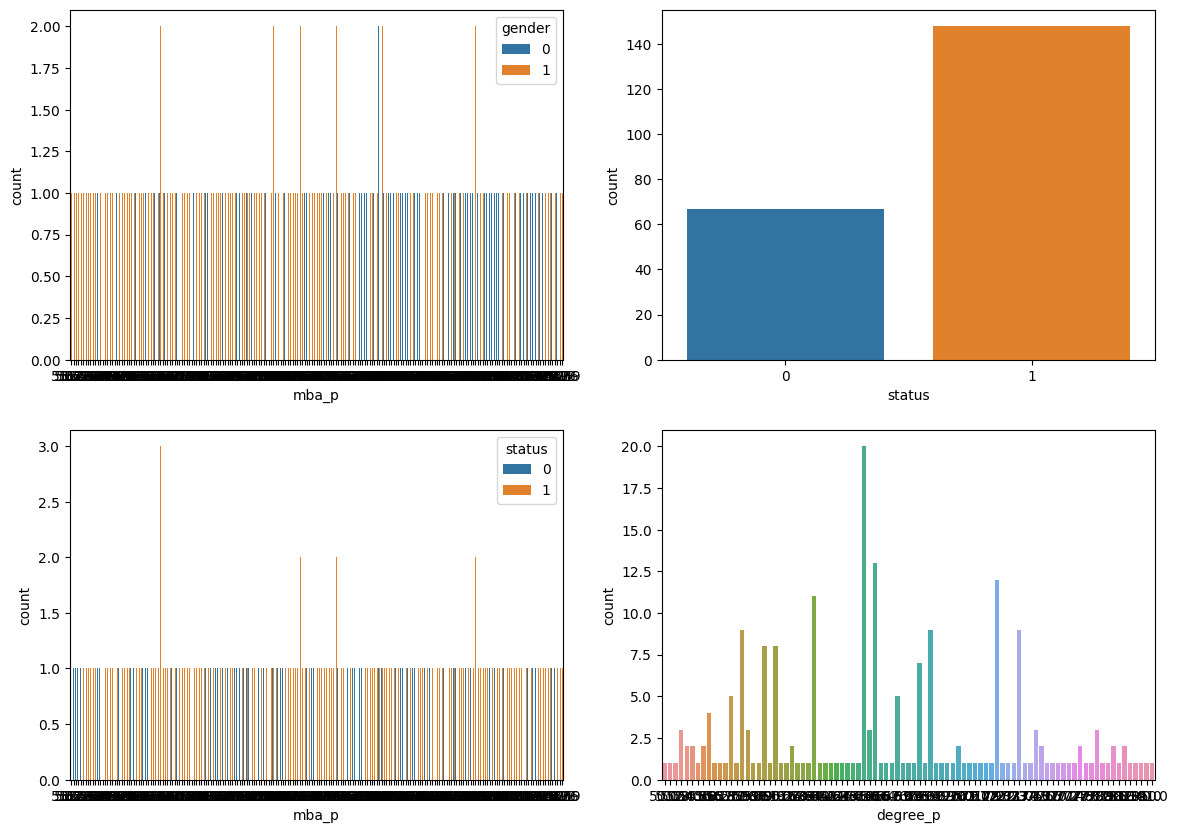

In [52]:
plt.subplots(2,2,figsize=(14,10))
plt.subplot(221)
sns.countplot(data=df,x='mba_p',hue='gender')

plt.subplot(222)
sns.countplot(data=df,x='status')

plt.subplot(223)
sns.countplot(data=df,x='mba_p',hue='status')

plt.subplot(224)
sns.countplot(data=df,x='degree_p')


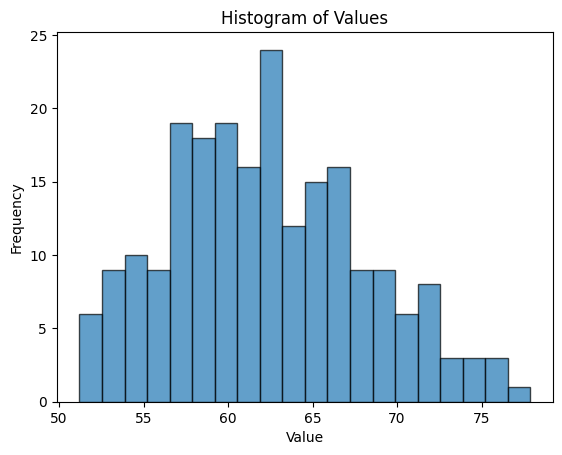

In [53]:
import matplotlib.pyplot as plt

# Assuming df contains a column named 'values'
data = df['mba_p']

plt.hist(data, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.show()


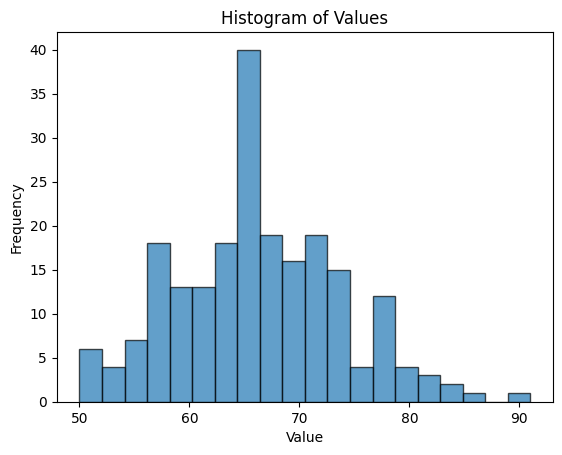

In [54]:
data = df['degree_p']

plt.hist(data, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.show()

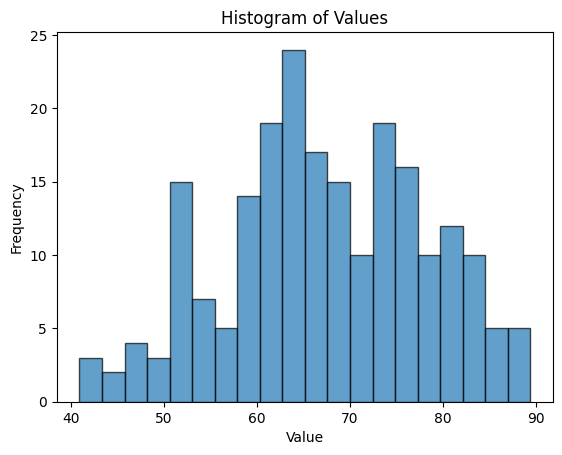

In [55]:
data = df['ssc_p']

plt.hist(data, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.show()

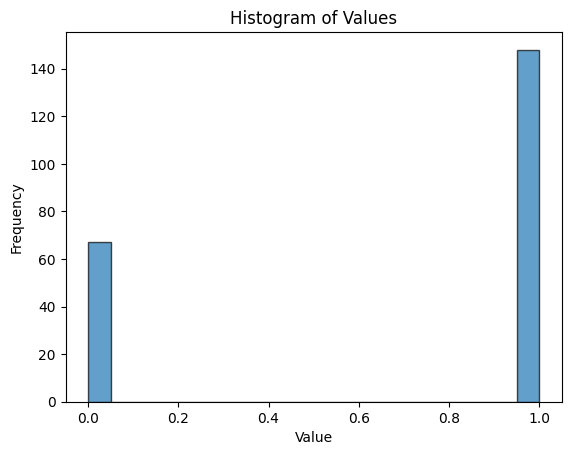

In [56]:
data = df['status']

plt.hist(data, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.show()

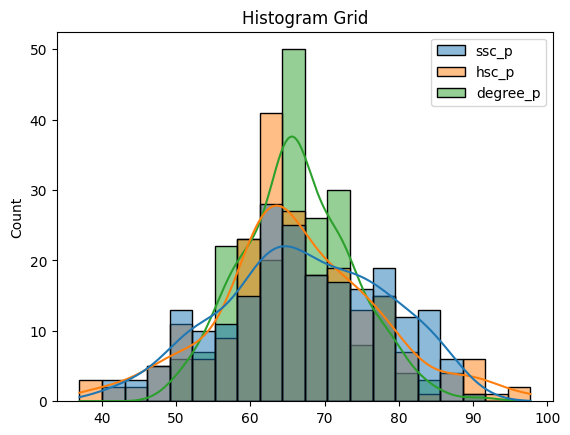

In [57]:
import seaborn as sns

# Assuming df has columns 'feature1', 'feature2', 'feature3'
sns.histplot(data=df[['ssc_p',	'hsc_p',	'degree_p',	]], bins=20, kde=True)
plt.title('Histogram Grid')
plt.show()

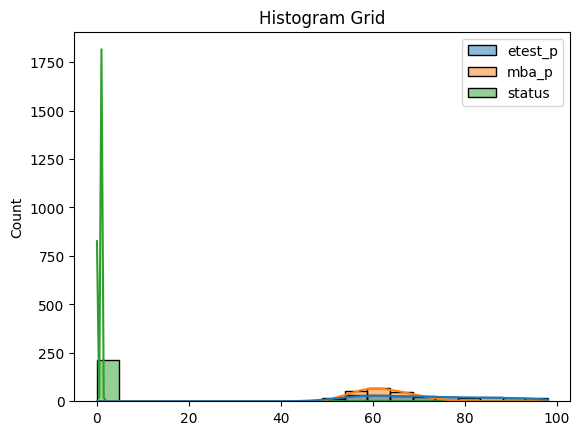

In [58]:
import seaborn as sns

# Assuming df has columns 'feature1', 'feature2', 'feature3'
sns.histplot(data=df[['etest_p',	'mba_p',	'status',	]], bins=20, kde=True)
plt.title('Histogram Grid')
plt.show()

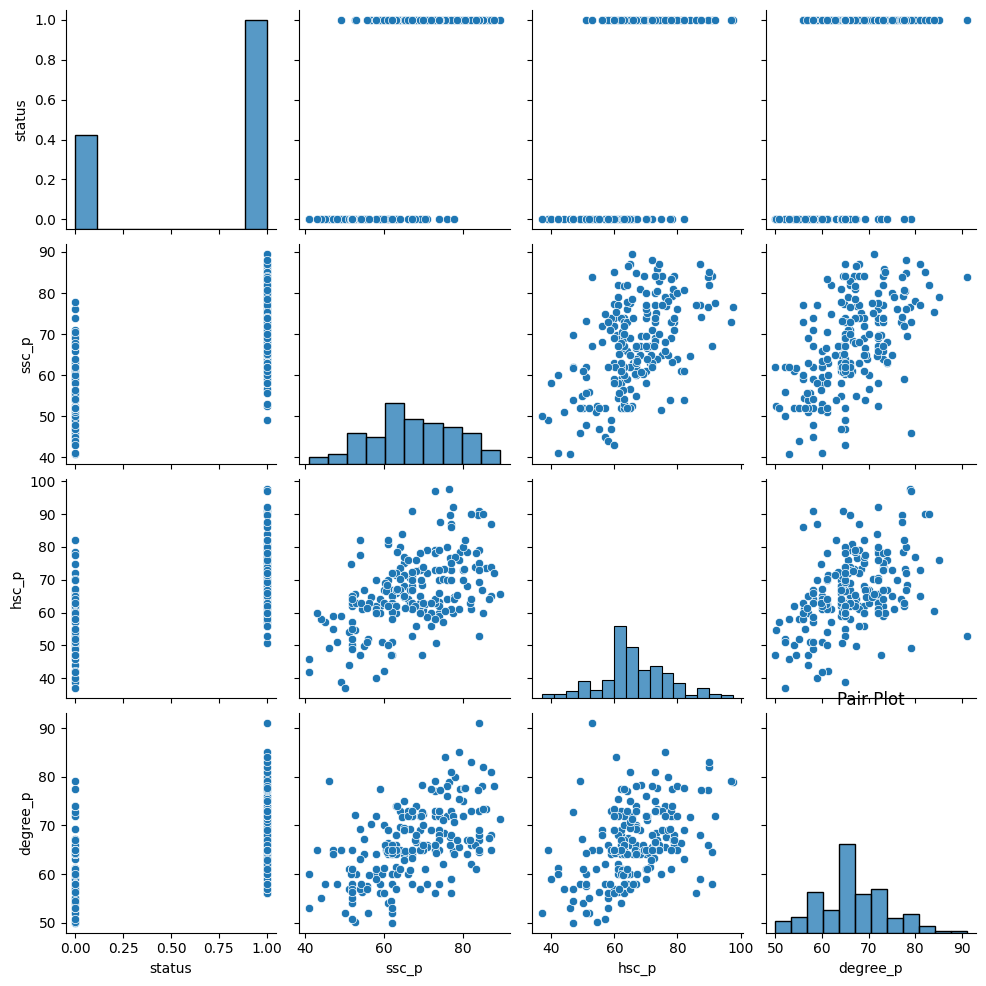

In [59]:
import seaborn as sns

# Assuming df has columns 'x', 'y1', 'y2', and 'y3'
sns.pairplot(df[['status', 'ssc_p', 'hsc_p', 'degree_p']])
plt.title('Pair Plot')
plt.show()

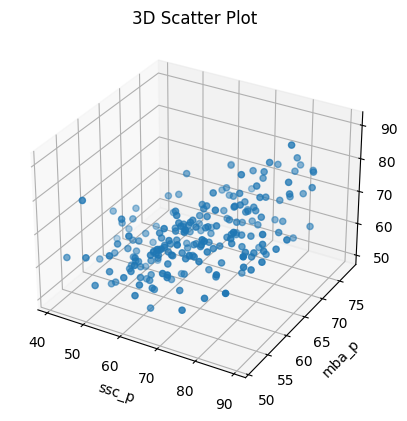

In [60]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming df has columns 'x', 'y', and 'z'
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['ssc_p'], df['mba_p'], df['degree_p'])
ax.set_xlabel('ssc_p')
ax.set_ylabel('mba_p')
ax.set_zlabel('degree_p')
ax.set_title('3D Scatter Plot')
plt.show()

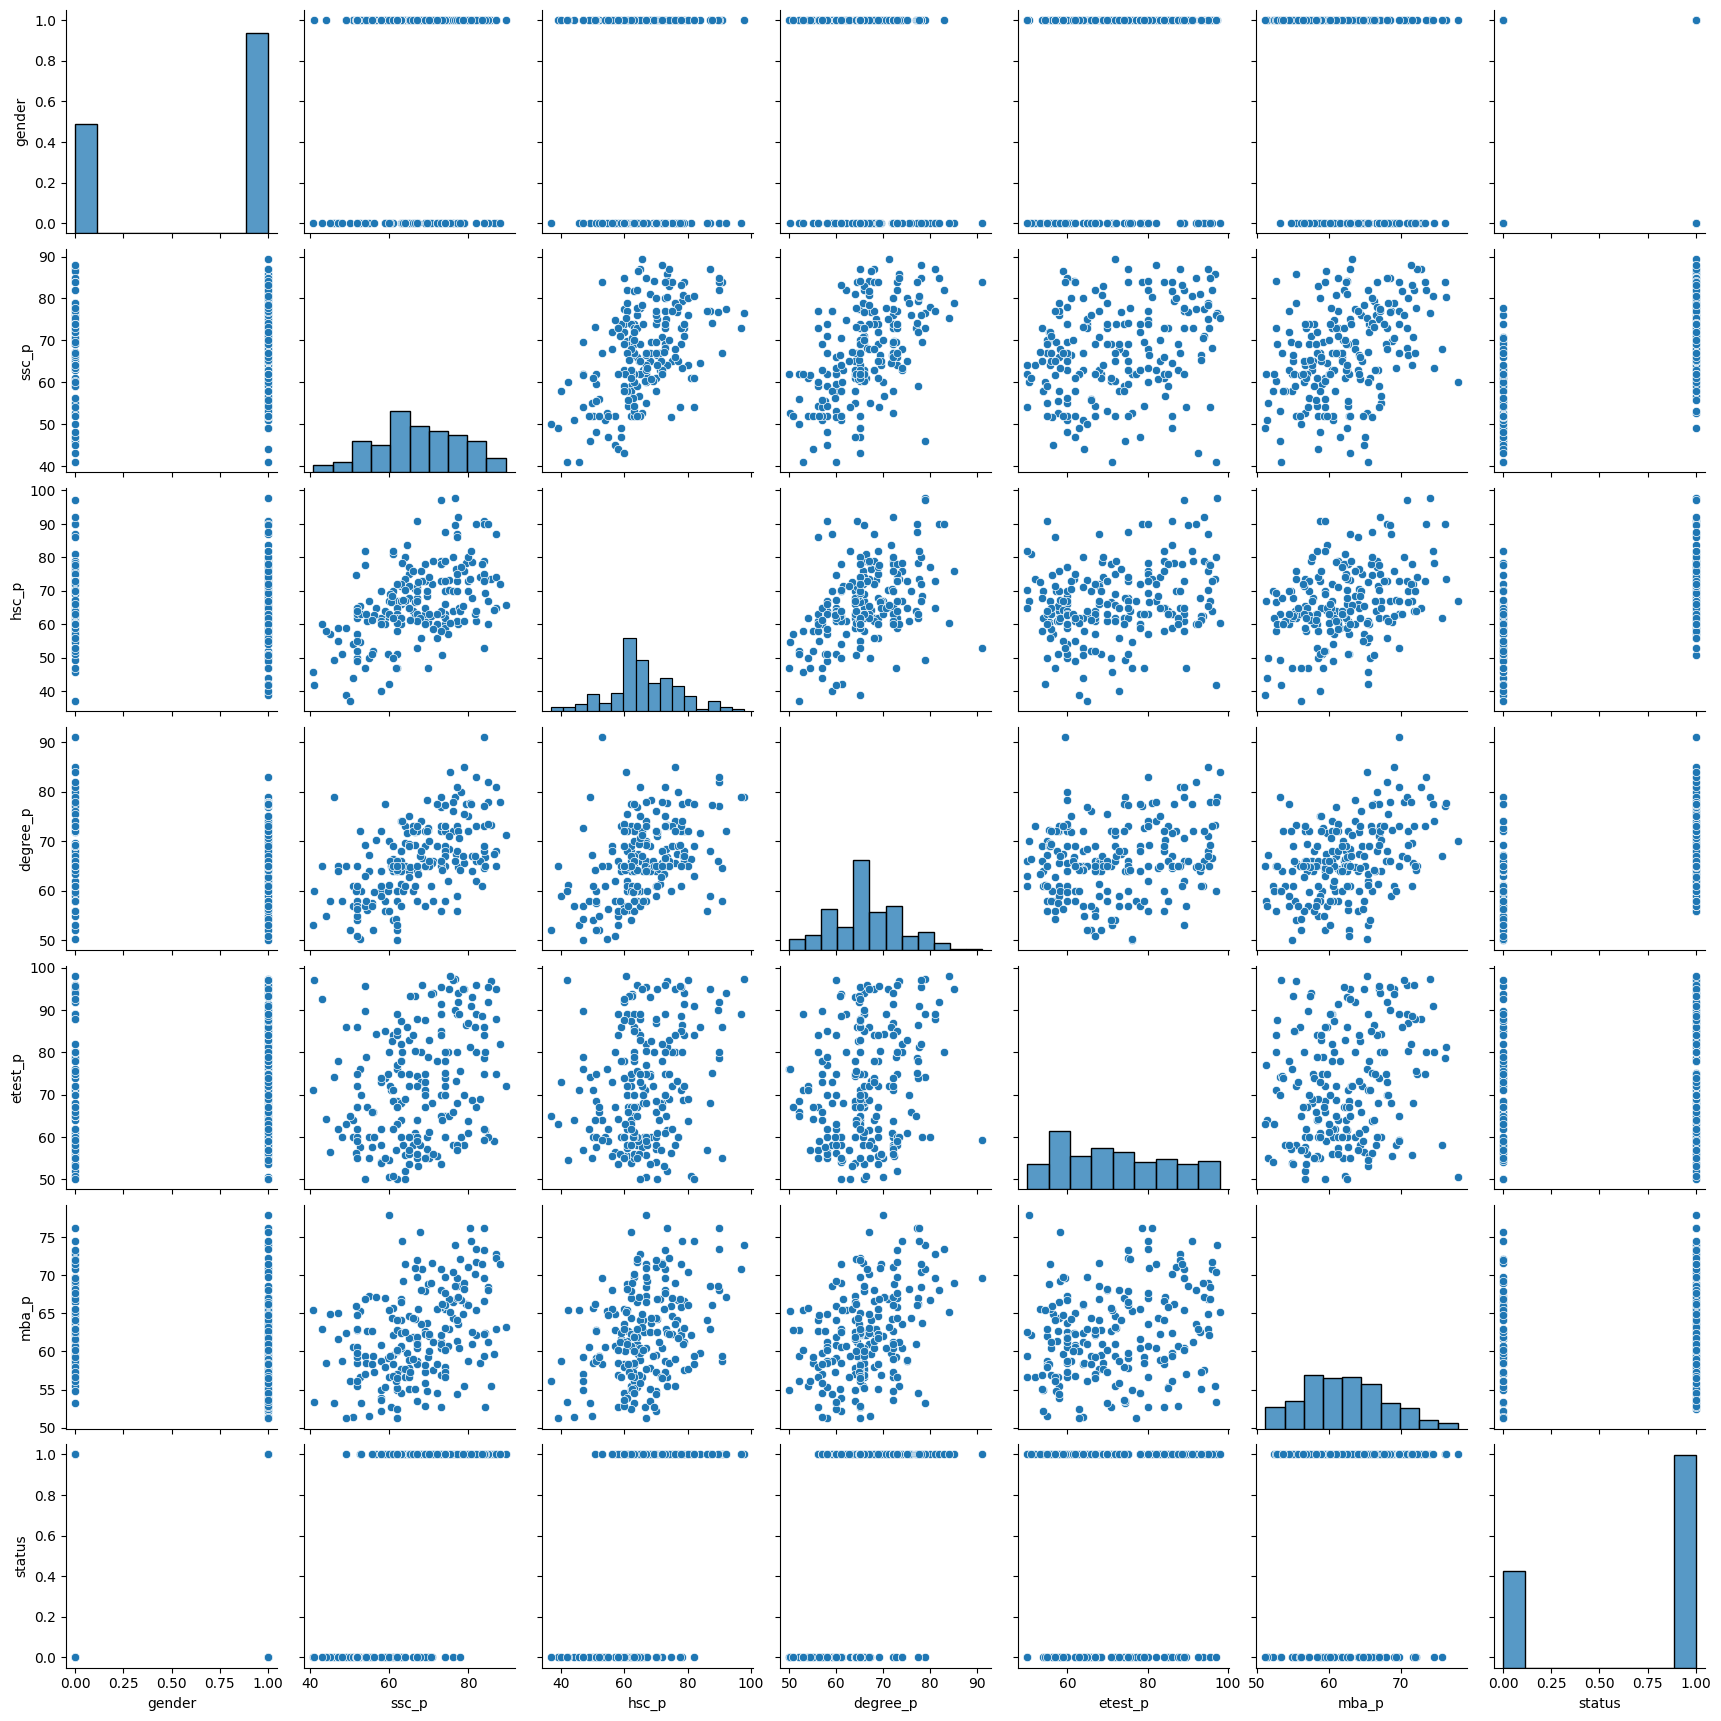

In [61]:
a=sns.pairplot(df)

<Axes: >

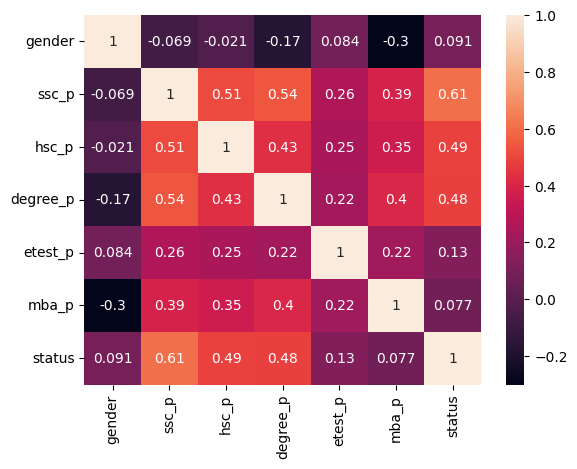

In [62]:
tc=df.corr()
sns.heatmap(tc,annot=True)

In [63]:
x=df.drop(columns='status')
x

,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p
0,1,67.00,91.00,58.00,55.0,58.80
1,1,79.33,78.33,77.48,86.5,66.28
2,1,65.00,68.00,64.00,75.0,57.80
3,1,56.00,52.00,52.00,66.0,59.43
4,1,85.80,73.60,73.30,96.8,55.50
...,...,...,...,...,...,...
210,1,80.60,82.00,77.60,91.0,74.49
211,1,58.00,60.00,72.00,74.0,53.62
212,1,67.00,67.00,73.00,59.0,69.72
213,0,74.00,66.00,58.00,70.0,60.23


In [64]:
y=df['status']
y

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 215, dtype: int64

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

In [66]:
print(x_train)

     gender  ssc_p  hsc_p  degree_p  etest_p  mba_p
30        0  64.00  73.50     73.00    52.00  56.70
74        1  56.60  64.80     70.20    84.27  67.20
103       1  73.00  78.00     73.00    85.00  65.83
88        0  66.00  62.00     73.00    58.00  64.36
86        1  62.00  63.00     64.00    67.00  57.03
..      ...    ...    ...       ...      ...    ...
200       1  69.00  60.00     65.00    87.55  52.81
184       0  56.28  62.83     59.79    60.00  57.29
131       0  74.90  57.00     62.00    80.00  60.78
152       0  75.40  60.50     84.00    98.00  65.25
106       1  61.08  50.00     54.00    71.00  65.69

[150 rows x 6 columns]


In [67]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(150, 6)
(150,)
(65, 6)
(65,)


In [68]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [69]:
clf=clf.fit(x_train,y_train)


In [70]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [71]:
y_pred=clf.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0])

In [72]:
np.c_[x_test,y_test,y_pred]

array([[ 1.  , 83.33, 78.  , 61.  , 88.56, 71.55,  1.  ,  1.  ],
       [ 0.  , 52.58, 54.6 , 50.2 , 76.  , 65.33,  0.  ,  0.  ],
       [ 0.  , 67.16, 72.5 , 63.35, 53.04, 65.52,  1.  ,  0.  ],
       [ 1.  , 52.  , 63.  , 65.  , 86.  , 56.09,  0.  ,  0.  ],
       [ 1.  , 84.  , 79.  , 68.  , 84.  , 66.69,  1.  ,  1.  ],
       [ 0.  , 52.  , 52.  , 55.  , 67.  , 59.32,  0.  ,  0.  ],
       [ 1.  , 67.  , 68.  , 64.  , 74.4 , 53.49,  1.  ,  1.  ],
       [ 1.  , 64.  , 80.  , 65.  , 69.  , 57.65,  1.  ,  1.  ],
       [ 1.  , 62.  , 51.  , 52.  , 68.44, 62.77,  0.  ,  0.  ],
       [ 0.  , 63.4 , 67.2 , 60.  , 58.06, 69.28,  0.  ,  1.  ],
       [ 0.  , 66.5 , 66.8 , 69.3 , 80.4 , 71.  ,  1.  ,  1.  ],
       [ 1.  , 55.68, 61.33, 56.87, 66.  , 58.3 ,  1.  ,  0.  ],
       [ 1.  , 63.  , 60.  , 57.  , 78.  , 54.55,  1.  ,  1.  ],
       [ 1.  , 62.  , 60.33, 64.21, 63.  , 60.02,  0.  ,  1.  ],
       [ 0.  , 67.  , 70.  , 65.  , 88.  , 71.96,  0.  ,  1.  ],
       [ 1.  , 65.  , 77.

In [73]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred)
cm

array([[13,  9],
       [ 6, 37]])

In [74]:
acc=metrics.accuracy_score(y_test,y_pred)*100
acc

76.92307692307693

In [75]:
print(x_test)
print(y_test)
print(y_pred)

     gender  ssc_p  hsc_p  degree_p  etest_p  mba_p
207       1  83.33   78.0     61.00    88.56  71.55
25        0  52.58   54.6     50.20    76.00  65.33
164       0  67.16   72.5     63.35    53.04  65.52
109       1  52.00   63.0     65.00    86.00  56.09
83        1  84.00   79.0     68.00    84.00  66.69
..      ...    ...    ...       ...      ...    ...
101       1  63.00   72.0     68.00    78.00  60.44
140       1  65.00   64.8     69.50    56.00  56.94
196       1  72.00   63.0     77.50    78.00  54.48
111       1  51.00   54.0     61.00    60.00  60.64
17        0  55.00   67.0     64.00    60.00  67.28

[65 rows x 6 columns]
207    1
25     0
164    1
109    0
83     1
      ..
101    1
140    1
196    1
111    0
17     0
Name: status, Length: 65, dtype: int64
[1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0]


In [76]:
pre=metrics.precision_score(y_test,y_pred)*100
pre

80.43478260869566

In [77]:
re=metrics.recall_score(y_test,y_pred)*100
re


86.04651162790698

In [78]:
f1=metrics.f1_score(y_test,y_pred)*100
f1

83.14606741573034

In [79]:
df

,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,status
0,1,67.00,91.00,58.00,55.0,58.80,1
1,1,79.33,78.33,77.48,86.5,66.28,1
2,1,65.00,68.00,64.00,75.0,57.80,1
3,1,56.00,52.00,52.00,66.0,59.43,0
4,1,85.80,73.60,73.30,96.8,55.50,1
...,...,...,...,...,...,...,...
210,1,80.60,82.00,77.60,91.0,74.49,1
211,1,58.00,60.00,72.00,74.0,53.62,1
212,1,67.00,67.00,73.00,59.0,69.72,1
213,0,74.00,66.00,58.00,70.0,60.23,1


In [80]:
pred=clf.predict([[1  , 52  , 62  , 54  , 72  , 55.41  ]])
pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [81]:
from sklearn.tree import export_graphviz

from six import StringIO

from IPython.display import Image

import pydotplus

import graphviz

In [82]:
x=[	'gender','ssc_p',	'hsc_p','degree_p',	'etest_p',	'mba_p'	]
y=['Placed','Not Placed']

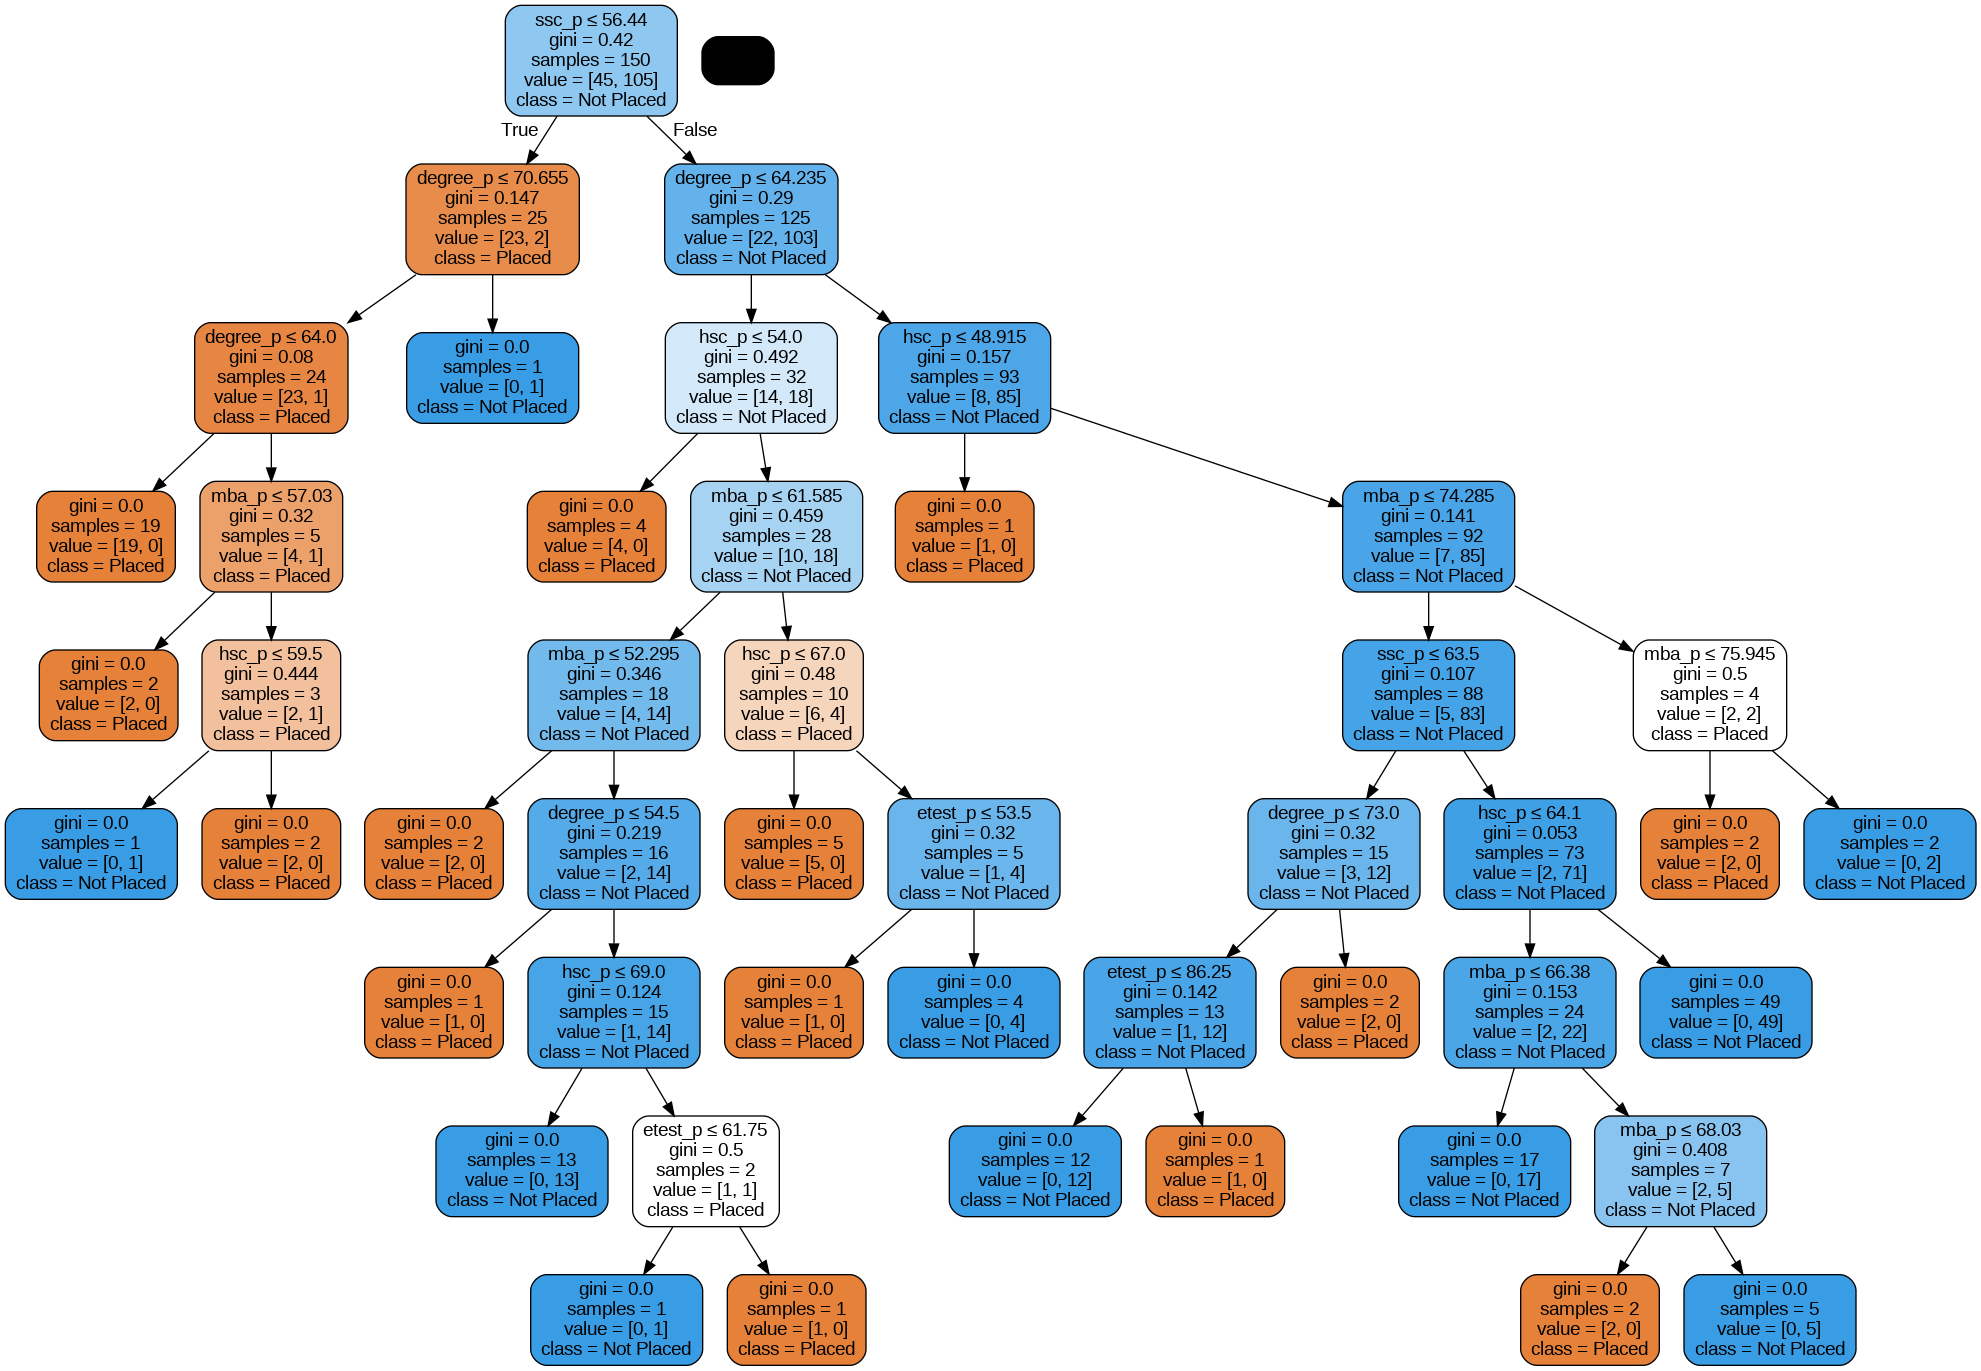

In [83]:
import graphviz
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names =x ,class_names=y)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('tree.png')
Image(graph.create_png())

In [84]:
import pickle
pickle.dump(clf,open('decision.pkl','wb'))

In [85]:
model = pickle.load(open('decision.pkl','rb'))
print(model.predict([[1  , 52  , 62  , 54  , 72  , 55.41]]))

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
